In [28]:
# Importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
# Importing data
data = load_iris(as_frame=True)
df = data.data

In [18]:
# Algorithm
kmeans = KMeans(n_clusters = 3, random_state = 42)
transformed = kmeans.fit_transform(df)

In [9]:
# Provide you the cluster id in which the data point came uneder
kmeans.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [10]:
# It will return the distance of each point from all the clusters
kmeans.transform(df)[:5]

# fit_predict method will return you the labels - hard clustering 
# fit_transform method will return you the distances of point from each label - soft clustering

array([[5.03132789, 0.14135063, 3.41251117],
       [5.08750645, 0.44763825, 3.38963991],
       [5.25229169, 0.4171091 , 3.56011415],
       [5.12704282, 0.52533799, 3.412319  ],
       [5.07638109, 0.18862662, 3.4603117 ]])

In [11]:
transformed_2 = kmeans.fit_predict(df)
kmeans.cluster_centers_ # Loaction of all the centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [ ]:
# Prediction
kmeans.predict(pd.DataFrame([[1.2, 5.6, 2.2, 5.5]], columns = df.columns))
# predict - hard clustering
# transform - soft clustering

array([1])

In [15]:
# Setting our own clusters insteed of random selection - init hyperparameter
# n_init hyperparameter - how many number of times your model will train and finds the best out of them

good_init = np.array([[0.4, 0.5, 0.6, 0.7], [0.2, 0.6, 0.8, 0.7], [0.5, 0.6, 0.7, 0.8]])
kmeans = KMeans(n_clusters = 3, init = good_init, n_init = 1)

In [19]:
# Performance Matric - Inertia
kmeans.inertia_

78.8556658259773

In [ ]:
# As you increase the number of clusters the inertia get lower and lower
kmeans_2 = KMeans(n_clusters = 5)
kmeans_2.fit(df)
print(kmeans_2.inertia_)

kmeans_3 = KMeans(n_clusters=2)
kmeans_3.fit(df)
print(kmeans_3.inertia_)

# As you increase the n_clusters the inertia becomes lesser and lesser
# So inertia is not a perfect metric for telling how kmeans well did the cluters

50.29995659882825
152.34795176035792


In [21]:
# This is non - acclerated kmeans | kmeans always use acclerated approach which sotres the upper and lower bound wrt each cluster centroid - for calculating the diatance
kmeans = KMeans(n_clusters = 3, algorithm = 'full') # This will find the distance of each point with all the clusters for the convergance

In [26]:
# Out of core learning
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
splits = np.vsplit(df, 5)

for i in range(5):
    split = splits[i]
    minibatch_kmeans.partial_fit(split) # Using partial fit method

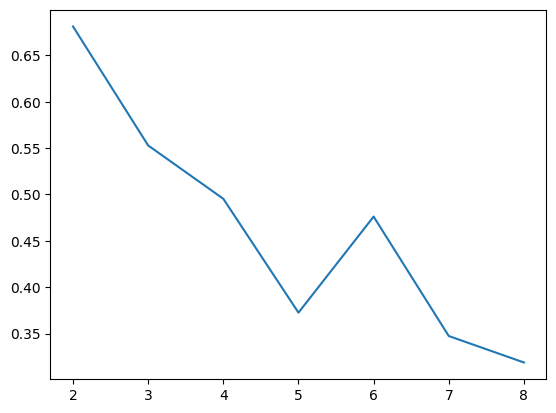

In [ ]:
# Finding the optimal number of clusters
from sklearn.metrics import silhouette_score

scores = []
for i in [2,3,4,5,6,7,8]:
    kmeans_4 = KMeans(n_clusters=i)
    kmeans_4.fit_predict(df)
    scores.append(silhouette_score(df, kmeans_4.labels_))

import matplotlib.pyplot as plt
plt.plot([2,3,4,5,6,7,8], scores)
plt.show()

# silhouette_score also compares the distance of each point with other points as well thats why this is the perfect metric for getting perfect number of clusters

# iris has 3 clusters - Cluster Overlap: With more clusters, there might be more overlap between clusters, which can reduce the silhouette score.

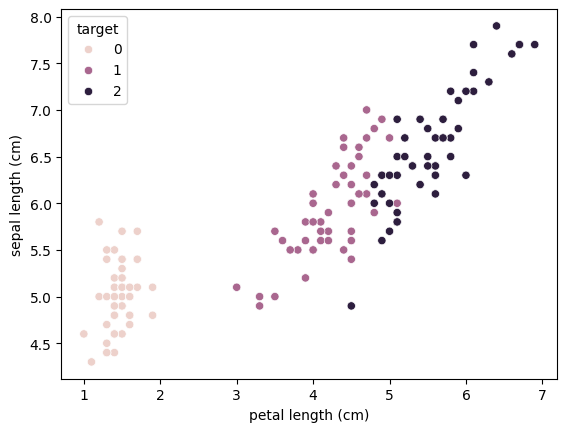

In [30]:
sns.scatterplot(x = df['petal length (cm)'], y = df['sepal length (cm)'], hue=data.target)
plt.show()

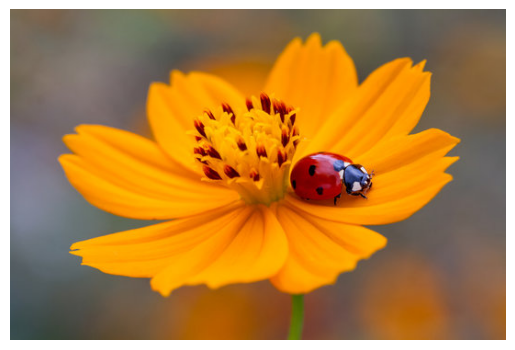

In [ ]:
# Image Segmentation
from matplotlib.image import imread  # you could also use `imageio.imread()`

image = imread('img.jpg')

plt.imshow(image)
plt.axis(False)
plt.show()

In [33]:
image.shape

(360, 540, 3)

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [36]:
kmeans.cluster_centers_

array([[117.59756568,  95.33499336,  78.01259161],
       [243.81566862, 147.16463626,   1.83151733]])

In [38]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

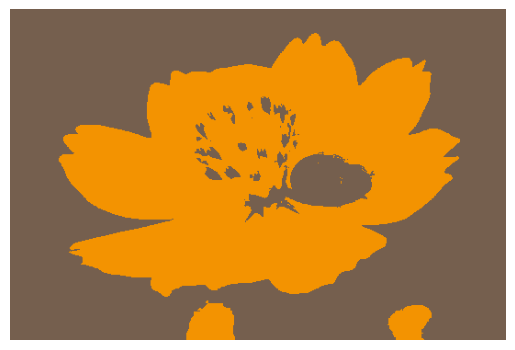

In [ ]:
plt.imshow(segmented_img.astype(int))
plt.axis('off')
plt.show()

# As you increase the number of clusters the image get more and more detailed - its like the number of clusters representing the amount of various types of colours present in the image. The more you increase it the more you get detailed image

In [53]:
# Dimeationality Reduction
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digit = load_digits(as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size = 0.2, random_state = 42)

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50)),
    ("log_reg", LogisticRegression(max_iter = 500)),
])

pipeline.fit(X_train, y_train)
np.round(pipeline.score(X_test, y_test), 2)

0.97

In [54]:
from sklearn.metrics import f1_score
np.round(f1_score(y_test, pipeline.predict(X_test), average = 'weighted'), 2)

0.97

In [55]:
pipeline_2 = Pipeline([
    ("log_reg", LogisticRegression(max_iter = 100)),
])

pipeline_2.fit(X_train, y_train)
np.round(pipeline_2.score(X_test, y_test))

1.0

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 1)
grid_clf.fit(X_train, y_train)

grid_clf.score(X_test, y_test)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


0.975

In [57]:
grid_clf.best_params_

{'kmeans__n_clusters': 87}